In [236]:
import numpy as np                      # numpy este o biblioteca pt calcul numeric si stiintific (numerical python)
import pandas as pd                     # pandas este folosit pt manipularea datelor (filtrare, sortare, agregare)
import matplotlib.pyplot as plt         # biblioteca grafica (asemanator cu matlab)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

The data is taken from https://archive.ics.uci.edu/dataset/846/accelerometer
I will use the dataset to determin if and when a cooler fan with weights on its blades will fail due to the vibrations from the mass distributed weights.

wconfig: 1 - weights on 2 neighboring blades
         2 - weights at a 90 degrees angle
         3 - weights at on opposite blades

pctid: speed of the fan (from 20% power to 100%)

x & y & z: data from vibrations measured

In [237]:
data = pd.read_csv("accelerometer.csv")    # reading the full data
print(data)

        wconfid  pctid      x      y      z
0             1     20  1.004  0.090 -0.125
1             1     20  1.004 -0.043 -0.125
2             1     20  0.969  0.090 -0.121
3             1     20  0.973 -0.012 -0.137
4             1     20  1.000 -0.016 -0.121
...         ...    ...    ...    ...    ...
152995        3    100  1.051  0.090 -0.262
152996        3    100  0.918  0.039 -0.129
152997        3    100  1.156 -0.094 -0.227
152998        3    100  0.934  0.203 -0.172
152999        3    100  1.199 -0.176  0.109

[153000 rows x 5 columns]


In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   wconfid  153000 non-null  int64  
 1   pctid    153000 non-null  int64  
 2   x        153000 non-null  float64
 3   y        153000 non-null  float64
 4   z        153000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.8 MB


array([[<Axes: title={'center': 'wconfid'}>,
        <Axes: title={'center': 'pctid'}>],
       [<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >]], dtype=object)

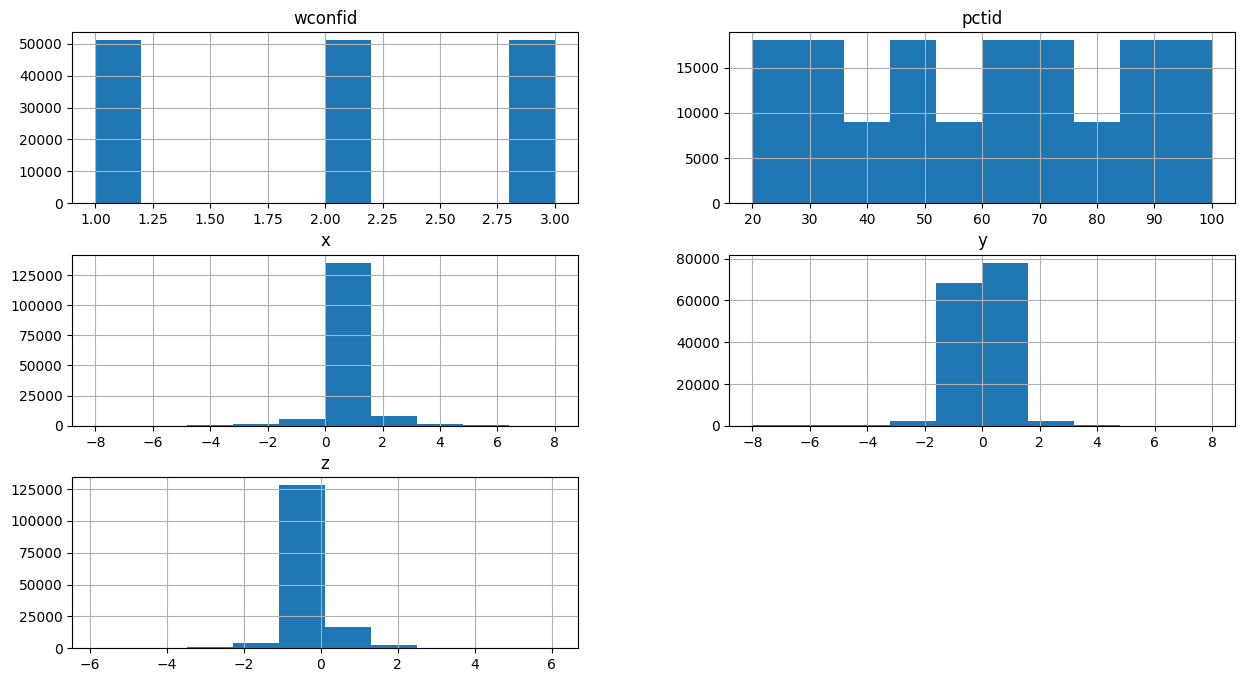

In [239]:
data.hist(figsize=(15,8))

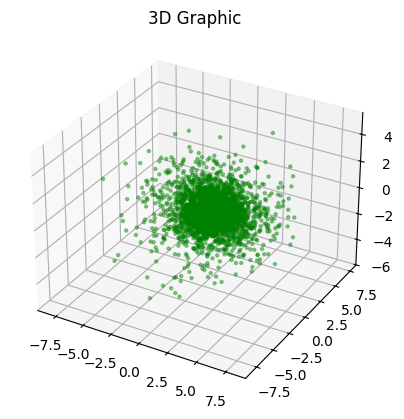

In [240]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')                                                          # matplot has only XoY, I add the Z as well with projection

data_sampled = data.sample(frac=0.1)                                                                # I keep only 10% of the data
ax.scatter(data_sampled['x'], data_sampled['y'], data_sampled['z'], c='green', s=5, alpha=0.4)      # s = size; alpha = transparancy
ax.set_title("3D Graphic")
plt.show()

In [241]:
data['vibration'] = np.sqrt(data['x']**2 + data['y']**2 + data['z']**2)                                                                     # formula for calculating vibrations

scaler = MinMaxScaler()                                                                                                                     # scaler between 0 and 1
data_scaled = pd.DataFrame(scaler.fit_transform(data[['vibration', 'wconfid', 'pctid']]), columns=['vibration', 'wconfid', 'pctid'])        # take and convert just the 3 columns

data_scaled['wear_score'] = 0.5 * data_scaled['vibration'] + 0.3 * data_scaled['wconfid'] + 0.2 * data_scaled['pctid']                      # came with this formula of the wear based on the 3 main factors
data_scaled['time_till_death']=(1-data_scaled['wear_score'])* np.random.uniform(100, 200)                                                   # same with the time until it fails
print(data_scaled)

        vibration  wconfid  pctid  wear_score  time_till_death
0        0.095588      0.0    0.0    0.047794       109.230622
1        0.095283      0.0    0.0    0.047642       109.248117
2        0.092116      0.0    0.0    0.046058       109.429784
3        0.092315      0.0    0.0    0.046157       109.418391
4        0.094764      0.0    0.0    0.047382       109.277886
...           ...      ...    ...         ...              ...
152995   0.102631      1.0    1.0    0.551315        51.470079
152996   0.086888      1.0    1.0    0.543444        52.373044
152997   0.112026      1.0    1.0    0.556013        50.931198
152998   0.091175      1.0    1.0    0.545588        52.127122
152999   0.115482      1.0    1.0    0.557741        50.732960

[153000 rows x 5 columns]


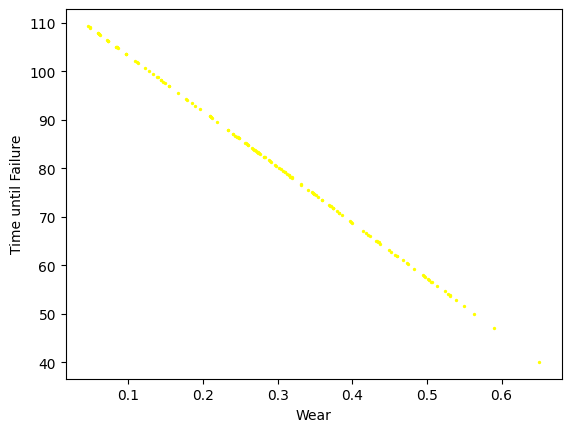

        wear_score  time_till_death
0         0.047794       109.230622
1         0.047642       109.248117
2         0.046058       109.429784
3         0.046157       109.418391
4         0.047382       109.277886
...            ...              ...
152995    0.551315        51.470079
152996    0.543444        52.373044
152997    0.556013        50.931198
152998    0.545588        52.127122
152999    0.557741        50.732960

[153000 rows x 2 columns]


In [242]:
print_needed_data = pd.DataFrame(data_scaled, columns=['wear_score', 'time_till_death'])                                 # simplified the data I need for my graph
scatter_sampled = print_needed_data.sample(frac=0.001)                                                                   # I keep only 0.1% of the data

plt.scatter(scatter_sampled['wear_score'],scatter_sampled['time_till_death'], color='yellow', s=2)

plt.xlabel("Wear")
plt.ylabel("Time until Failure")
plt.show()
print(print_needed_data)

In [243]:
train_data, valid_data, test_data = np.split(data_scaled.sample(frac=1), [int (0.4*len(data_scaled)),int (0.7*len(data_scaled))])

# 40% of the data will be the training data
# from 40% to 70% (30%) will be my validation data
# the rest of 30% will be the testing data

print(train_data)

        vibration  wconfid   pctid  wear_score  time_till_death
90251    0.219721      0.5  0.8125    0.422360        66.262923
75078    0.100056      0.5  0.5000    0.300028        80.296079
53939    0.097245      0.5  0.0000    0.198622        91.928620
59751    0.093352      0.5  0.1250    0.221676        89.284089
92024    0.237025      0.5  0.8125    0.431012        65.270405
...           ...      ...     ...         ...              ...
59349    0.093478      0.5  0.1250    0.221739        89.276865
54328    0.095476      0.5  0.0625    0.210238        90.596139
141228   0.070475      1.0  0.8125    0.497737        57.616189
117174   0.095028      1.0  0.3125    0.410014        67.679218
14405    0.094460      0.0  0.2500    0.097230       103.559651

[61200 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


The best algorithm for this type of problem is Neural Network, because we do not have the time until failure measured. So it is not a regression or a classification problem, to have an output known.
For this solution, I will use TensorFlow, because it is an open source library with the hidden layers already trained.

In [244]:
import tensorflow as tf

In [245]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')  # sau 'Mean Absolute Error', după caz
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_mae(history):
    plt.plot(history.history['mae'], label='MAE (train)')
    plt.plot(history.history['val_mae'], label='MAE (val)')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.grid(True)
    plt.show()



In [246]:
model = tf.keras.Sequential([

    tf.keras.layers.Dense(4, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 4)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

In [247]:
X_train = train_data [['vibration', 'wconfid','pctid']]

scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(train_data[['time_till_death']])

history = model.fit(
    X_train, y_train, epochs=10, batch_size=1024, validation_split=0.2, verbose=1
)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0609 - mae: 0.1976 - val_loss: 0.0561 - val_mae: 0.1902
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0538 - mae: 0.1861 - val_loss: 0.0493 - val_mae: 0.1783
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0475 - mae: 0.1757 - val_loss: 0.0423 - val_mae: 0.1688
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0406 - mae: 0.1669 - val_loss: 0.0359 - val_mae: 0.1603
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0351 - mae: 0.1578 - val_loss: 0.0297 - val_mae: 0.1478
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0300 - mae: 0.1453 - val_loss: 0.0247 - val_mae: 0.1342
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0265 - mae: 0.1344 - val_loss: 0.0216 - val_mae: 0.1246
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0240 - mae: 0.1258 - val_loss: 0.0195 - val_mae: 0.1177
Epoch 9/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0224 - mae: 

1913/1913 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step


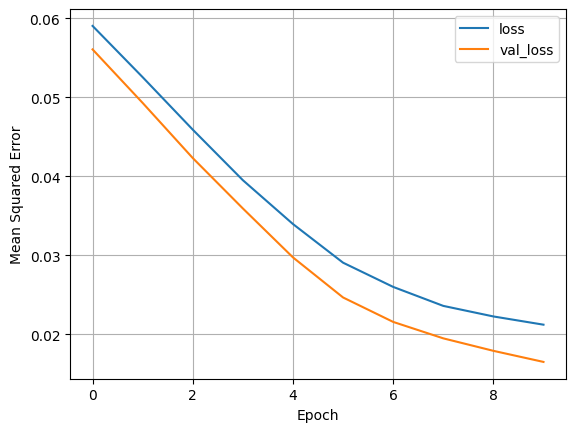

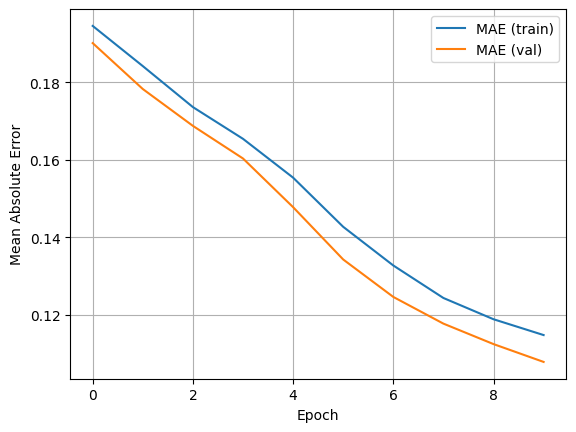

/tmp/ipykernel_67165/3953137993.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


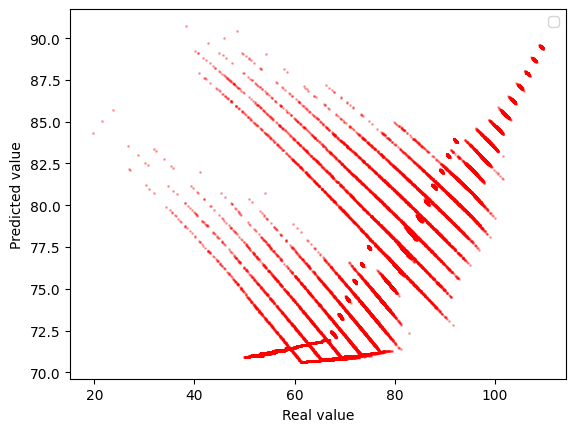

In [ ]:
# 1. Obține predicțiile modelului
y_pred_scaled = model.predict(X_train)

# 2. Inversează scala pentru predicțiile obținute
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Acum, `y_pred` va conține valorile în unitățile originale ale 'time_till_death'.


plot_loss(history)
plot_mae(history)

plt.scatter(train_data['time_till_death'],y_pred,color='red',s=1,alpha=0.3)
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.show()